In [17]:
from runner import test_run, available_ports, LABEL_MAP, TestPlan, TestStep
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Print available COM ports (pass to TestPlan __init__).
print(available_ports())

# Datapoints are organized by "keys," available values are below.
print(LABEL_MAP.keys())

['COM4', 'COM5', 'COM3', 'COM7']
dict_keys(['time_ms', 'top_motor_rpm', 'bottom_motor_rpm', 'batt_voltage_V', 'batt_current_A', 'top_current_A', 'bottom_current_A', 'thrust_N', 'torque_N'])


In [3]:
# 1. Create a test plan consisting of steps.
steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=1_000)
    for i in np.arange(5, 31, 5)
]
plan = TestPlan("test", steps=steps)
plan

TestPlan(name='test', steps=[TestStep(duration_ms=1000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=1000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=1000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=1000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=1000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=1000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None)])

In [4]:
# 2. Connect to jig and run the test.
df = test_run(
    filename="../test_data/thrust_jig_calibration_data/hall_sensor/bottom_motor_sweep_01_13.csv",
    plan=plan,
)

Loading saved data


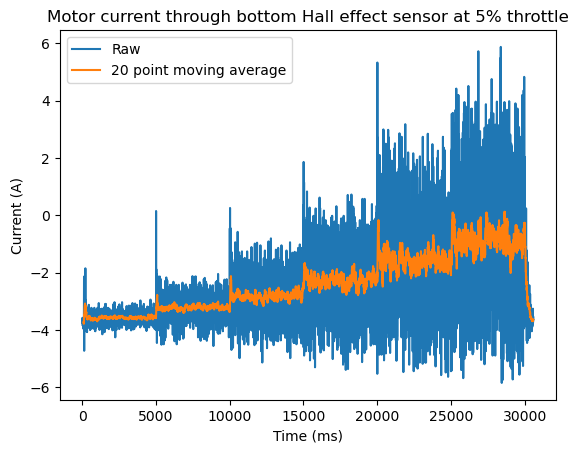

In [5]:
# 3. Plot data or get values as Numpy array.
# df.plot(y="bottom_current_A")
time_ms = df.index
bottom_current = df["bottom_current_A"]
plt.plot(time_ms, bottom_current, label="Raw")
flt_current = bottom_current.rolling(window=20).mean()
plt.plot(time_ms, flt_current, label="20 point moving average")
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.title("Motor current through bottom Hall effect sensor at 5% throttle")
plt.legend()

-0.11789154320987655


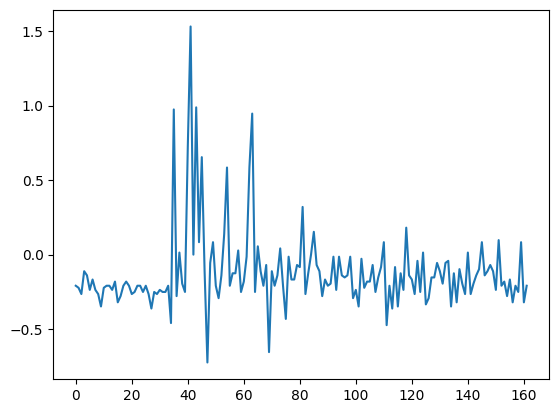

In [6]:
data = runner.values("bottom_current_A", tmin=0, tmax=500)
plt.plot(data)
print(np.average(data))

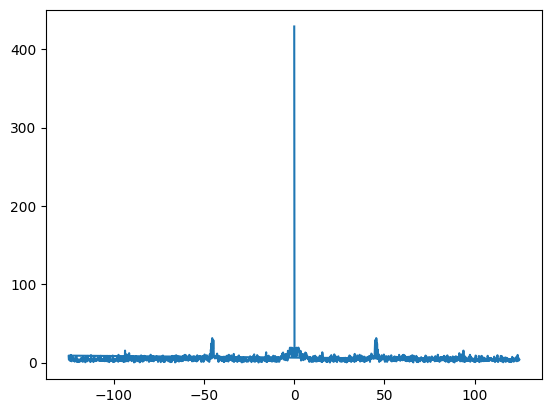

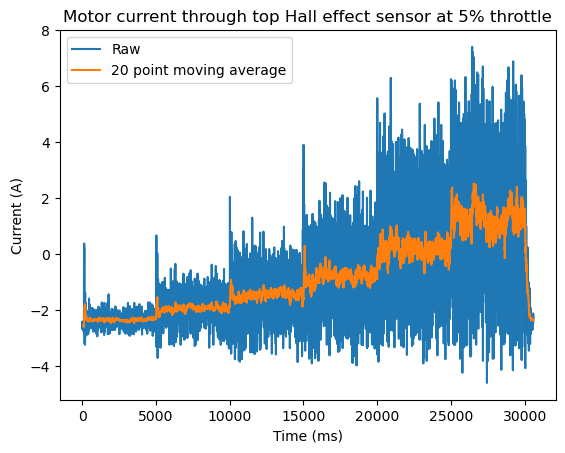

In [65]:
# 3. Plot data or get values as Numpy array.
# df.plot(y="top_current_A")
time_ms = df.index
bottom_current = df["top_current_A"]
plt.plot(time_ms, bottom_current, label="Raw")
flt_current = bottom_current.rolling(window=20).mean()
plt.plot(time_ms, flt_current, label="20 point moving average")
plt.xlabel("Time (ms)")
plt.ylabel("Current (A)")
plt.title("Motor current through top Hall effect sensor at 5% throttle")
plt.legend()

<Axes: title={'center': 'Battery voltage'}, xlabel='Time (ms)', ylabel='Voltage (V)'>

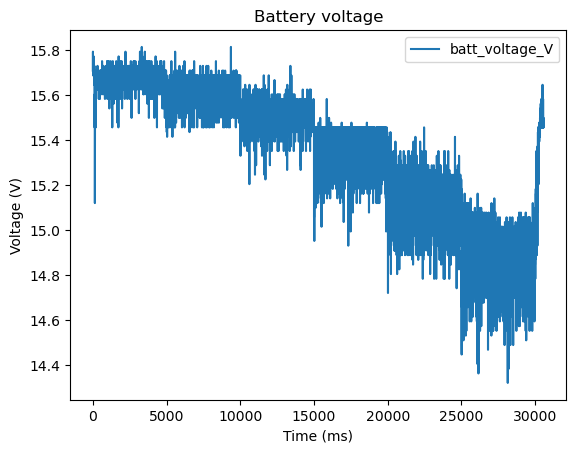

In [7]:
df.plot(
    y="batt_voltage_V",
    title="Battery voltage",
    xlabel="Time (ms)",
    ylabel="Voltage (V)",
)

In [8]:
df["top_current_A"].mean() * 66

-56.846144252549024

In [9]:
df["bottom_current_A"].mean() * 66

-157.99359588941178

Loading saved data


<Axes: xlabel='time_ms'>

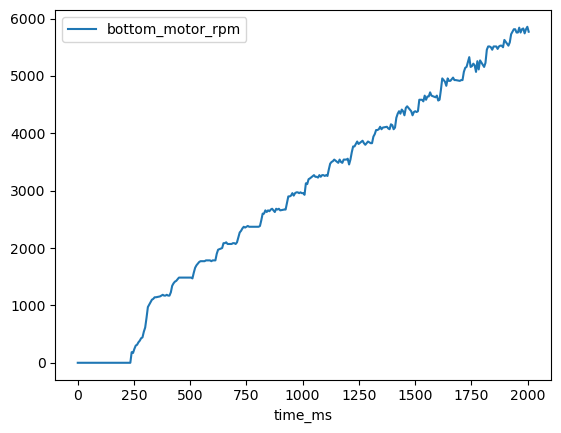

In [10]:
loaded_data = test_run("example_csv.csv")
loaded_data.plot(y="bottom_motor_rpm")